In [1]:
import librosa
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity


In [8]:
# Load your FLAC file
file_path = r"Flux Pavilion & Matthew Koma - Emotional.mp3"
y, sr = librosa.load(file_path, sr=None)  # sr=None preserves the original sample rate
print(f"Audio data shape: {y.shape}, Sample rate: {sr}")


Audio data shape: (10391663,), Sample rate: 44100


MFCC shape: (13, 20297)


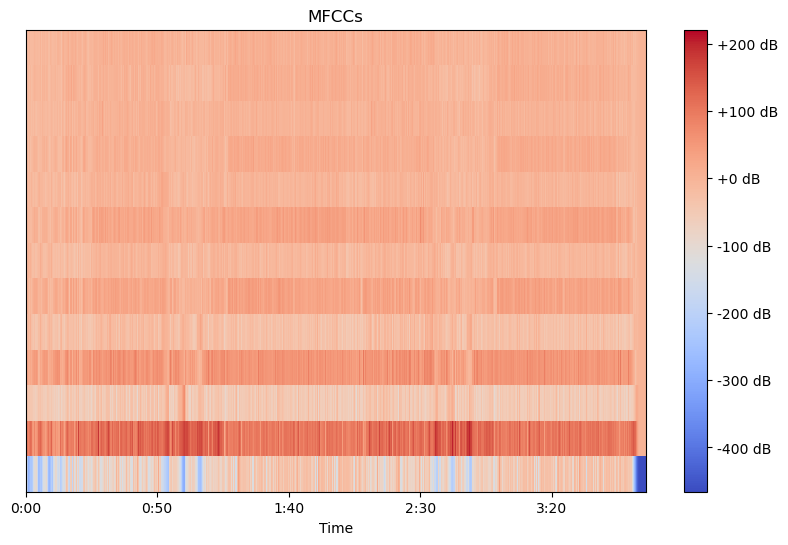

In [9]:
# Extract MFCC (Mel-frequency cepstral coefficients) features
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)  # You can adjust the number of MFCCs
print(f"MFCC shape: {mfcc.shape}")

# Visualize the MFCC features
plt.figure(figsize=(10, 6))
librosa.display.specshow(mfcc, x_axis='time', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('MFCCs')
plt.show()

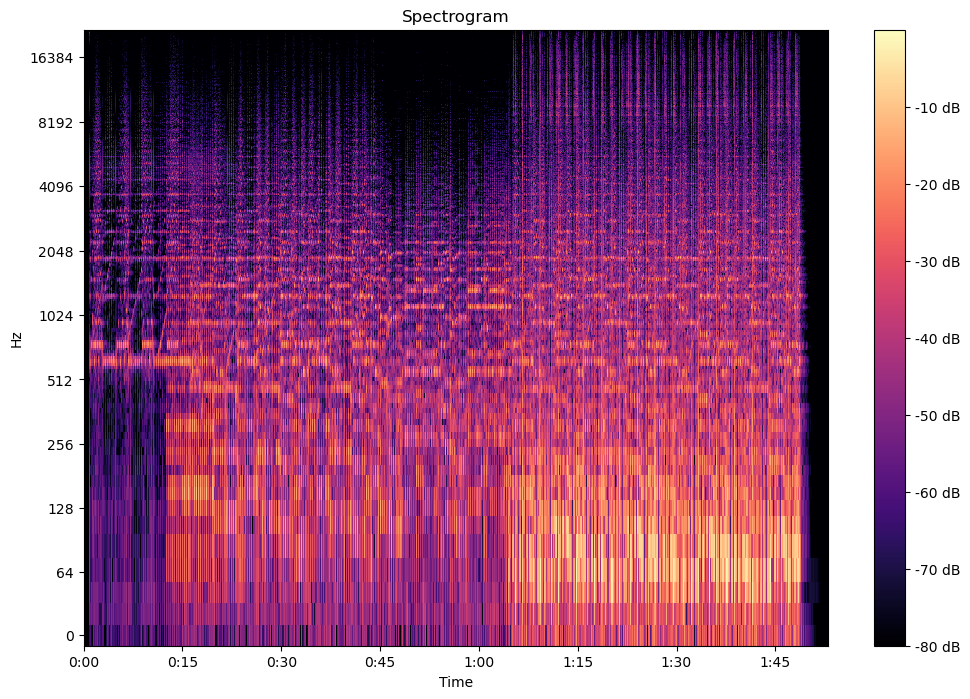

In [4]:
# Compute the Short-Time Fourier Transform (STFT)
D = librosa.stft(y)

# Convert the amplitude to decibels for better visualization
DB = librosa.amplitude_to_db(np.abs(D), ref=np.max)

# Visualize the Spectrogram
plt.figure(figsize=(12, 8))
librosa.display.specshow(DB, x_axis='time', y_axis='log', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()


In [10]:
# Compute the chromagram of the audio signal
chromagram = librosa.feature.chroma_stft(y=y, sr=sr, n_chroma=12, n_fft=2048, hop_length=512)

# Compute the Self-Similarity Matrix (SSM)
# We will calculate the pairwise similarity between columns of the chromagram using the cosine similarity
ssm = np.inner(chromagram.T, chromagram.T)

# Plot the Self-Similarity Matrix
plt.figure(figsize=(10, 8))
librosa.display.specshow(ssm, cmap='magma', x_axis='time', y_axis='time', sr=sr)
plt.colorbar()
plt.title('Self-Similarity Matrix (SSM)')
plt.show()


KeyboardInterrupt


KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x000002392ABF6480> (for post_execute), with arguments args (),kwargs {}:
Error in callback <function flush_figures at 0x0000023930687240> (for post_execute), with arguments args (),kwargs {}:



KeyboardInterrupt



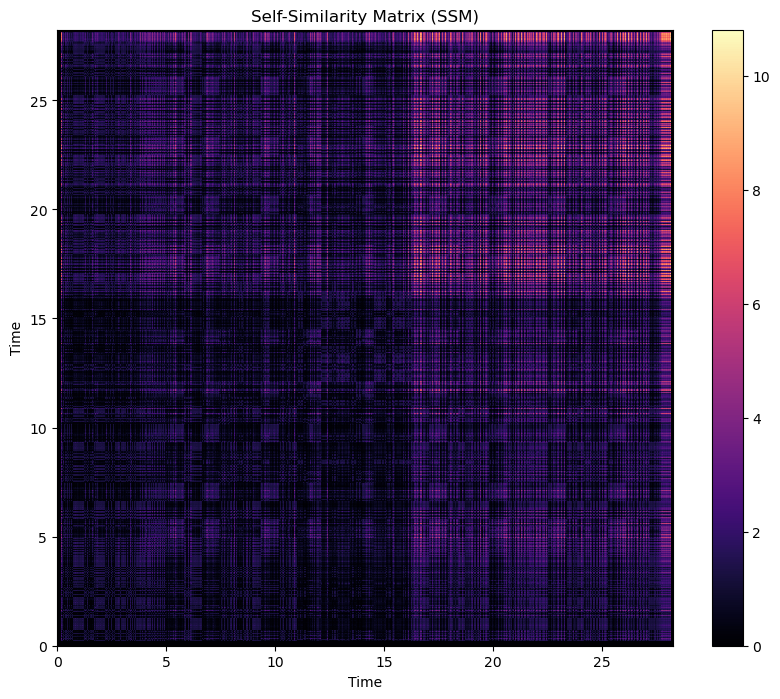

In [6]:
# Compute the chromagram of the audio signal with a larger hop_length (reduces resolution)
hop_length = 2048  # Increase hop length to reduce resolution (you can experiment with this)
chromagram = librosa.feature.chroma_stft(y=y, sr=sr, n_chroma=12, n_fft=2048, hop_length=hop_length)

# Compute the Self-Similarity Matrix (SSM)
ssm = np.inner(chromagram.T, chromagram.T)

# Plot the Self-Similarity Matrix
plt.figure(figsize=(10, 8))
librosa.display.specshow(ssm, cmap='magma', x_axis='time', y_axis='time', sr=sr)
plt.colorbar()
plt.title('Self-Similarity Matrix (SSM)')
plt.show()


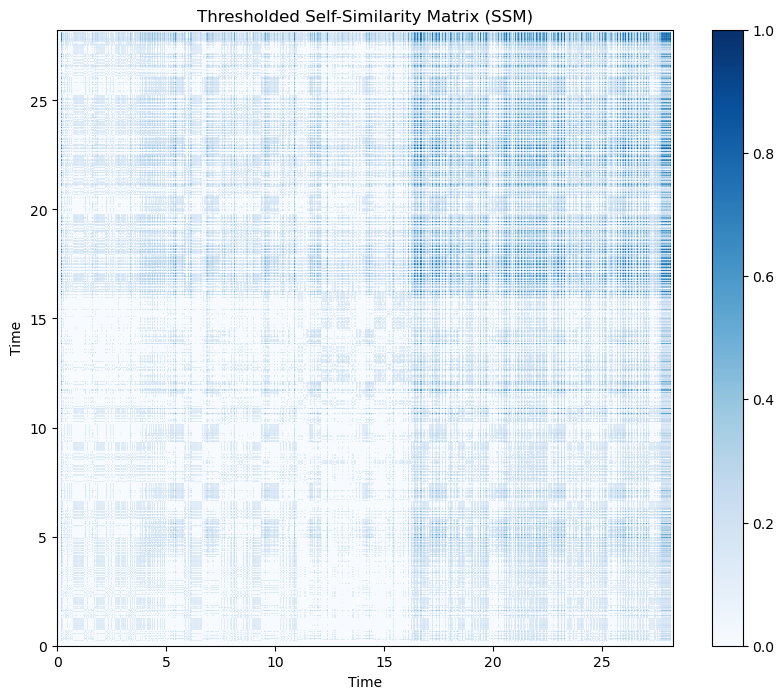

In [7]:
# Normalize the SSM
ssm_normalized = (ssm - np.min(ssm)) / (np.max(ssm) - np.min(ssm))

# Apply a threshold to remove small values
threshold = 0.1
ssm_thresholded = np.where(ssm_normalized > threshold, ssm_normalized, 0)

# Plot the thresholded Self-Similarity Matrix
plt.figure(figsize=(10, 8))
librosa.display.specshow(ssm_thresholded, cmap='magma', x_axis='time', y_axis='time', sr=sr)
plt.colorbar()
plt.title('Thresholded Self-Similarity Matrix (SSM)')
plt.show()


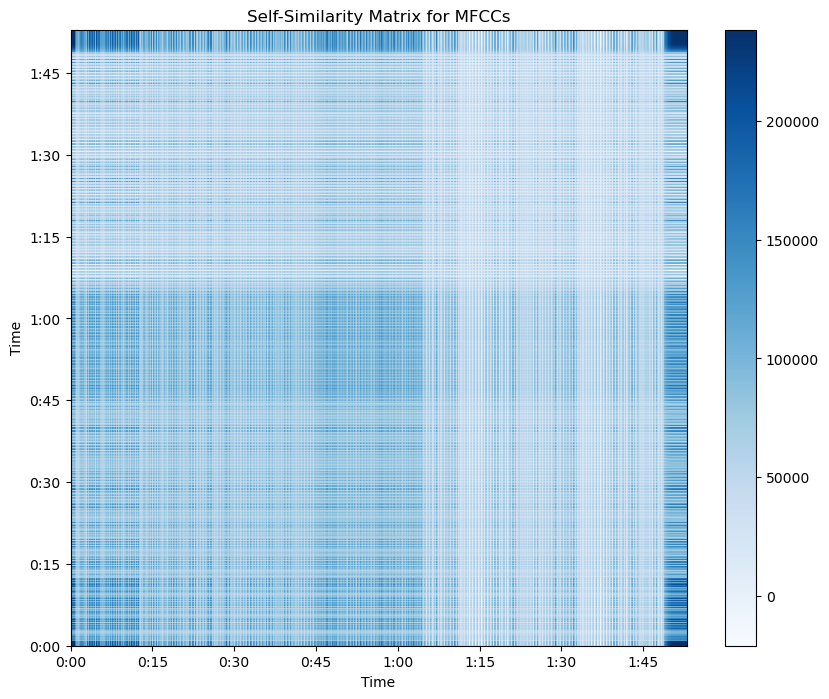

In [8]:
# Compute MFCC features with fewer coefficients (e.g., 5 instead of 13)
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=5)

# Compute the Self-Similarity Matrix for MFCCs
ssm_mfcc = np.inner(mfcc.T, mfcc.T)

# Plot the Self-Similarity Matrix for MFCCs
plt.figure(figsize=(10, 8))
librosa.display.specshow(ssm_mfcc, cmap='magma', x_axis='time', y_axis='time', sr=sr)
plt.colorbar()
plt.title('Self-Similarity Matrix for MFCCs')
plt.show()


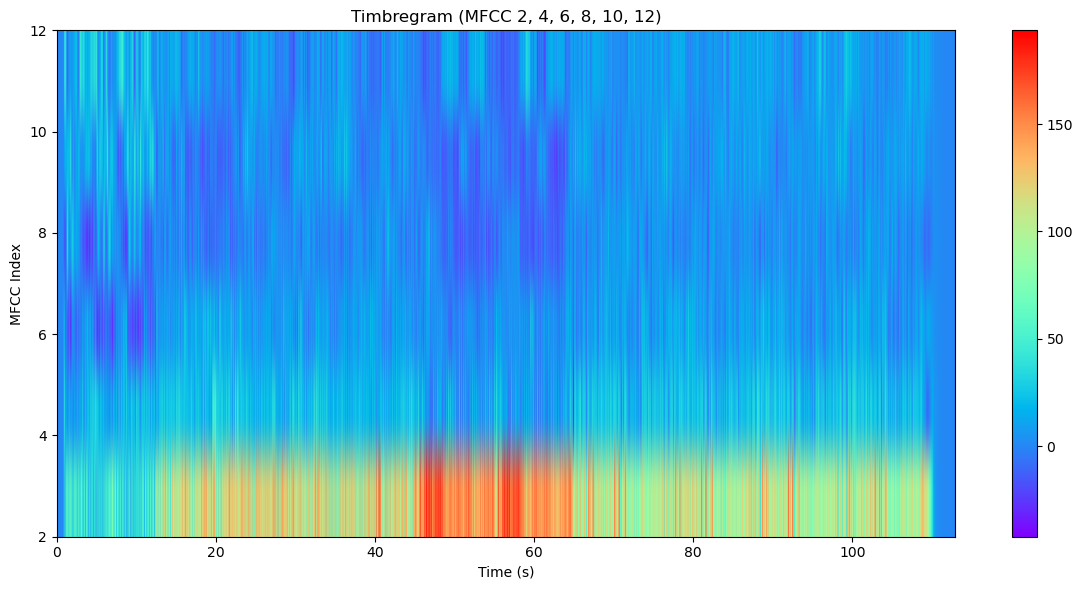

In [40]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load FLAC file
filename = r"01. Vitalic.flac" # Replace this with your actual .flac file path
y, sr = librosa.load(filename)

# Extract MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# Select specific MFCC indices (2,4,6,8,10,12) => zero-based indices: 1,3,5,7,9,11
selected_indices = [1, 3, 5, 7, 9, 11]
selected_mfccs = mfccs[selected_indices, :]

# Generate time axis in seconds
frames = np.arange(selected_mfccs.shape[1])
t = librosa.frames_to_time(frames, sr=sr)

# Plot the timbregram
plt.figure(figsize=(12, 6))
img = plt.imshow(selected_mfccs, aspect='auto', origin='lower',
                 extent=[t[0], t[-1], 2, 12], cmap='rainbow')

plt.colorbar(img)
plt.xlabel('Time (s)')
plt.ylabel('MFCC Index')
plt.title('Timbregram (MFCC 2, 4, 6, 8, 10, 12)')
plt.yticks([2, 4, 6, 8, 10, 12])
plt.tight_layout()
plt.show()


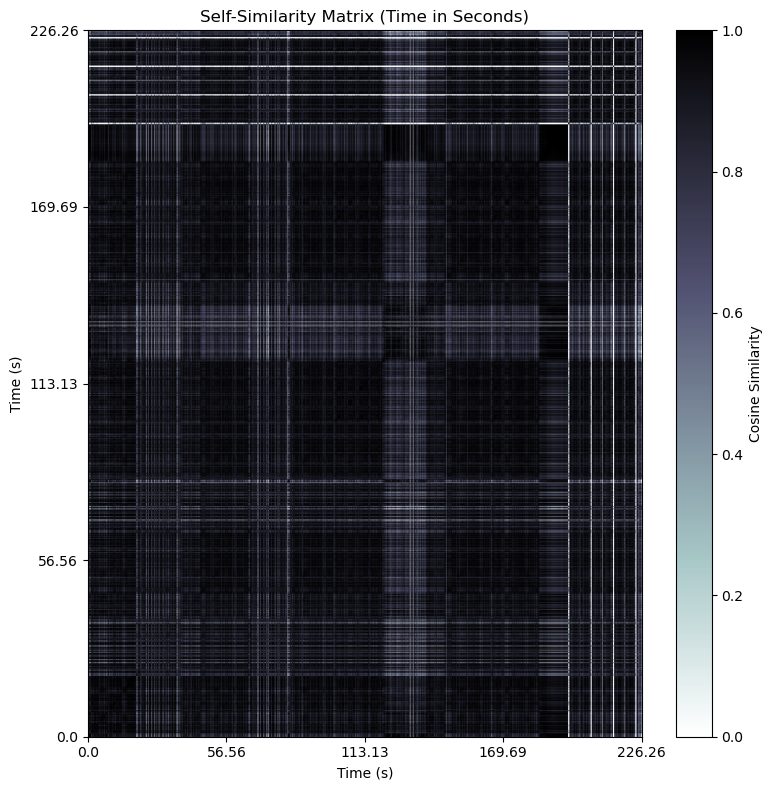

In [33]:
from sklearn.metrics.pairwise import cosine_similarity

# Extract MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# Use MFCC indices 2,4,6,8,10,12 (zero-based: 1,3,5,7,9,11)
selected_indices = [1, 3, 5, 7, 9, 11]
selected_mfccs = mfccs[selected_indices, :]  # shape: (6, T)

# Transpose so we get (time frames, features)
mfcc_vectors = selected_mfccs.T  # shape: (frames, 6)

# Compute the self-similarity matrix (Cosine similarity)
ssm = cosine_similarity(mfcc_vectors)

# Convert frame numbers to time in seconds
frames = np.arange(ssm.shape[0])
time_seconds = librosa.frames_to_time(frames, sr=sr)

# Optional: enhance contrast by clipping small values
ssm[ssm < 0.3] = 0  # Anything less than 0.3 becomes 0

# Plot the Self-Similarity Matrix
plt.figure(figsize=(8, 8))
plt.imshow(ssm, cmap='bone_r', origin='lower', aspect='auto')

# Adjust x and y axis to show time in seconds
plt.xticks(np.linspace(0, len(time_seconds) - 1, 5), np.round(np.linspace(time_seconds[0], time_seconds[-1], 5), 2))
plt.yticks(np.linspace(0, len(time_seconds) - 1, 5), np.round(np.linspace(time_seconds[0], time_seconds[-1], 5), 2))

plt.title('Self-Similarity Matrix (Time in Seconds)')
plt.xlabel('Time (s)')
plt.ylabel('Time (s)')
plt.colorbar(label='Cosine Similarity')
plt.tight_layout()
plt.show()

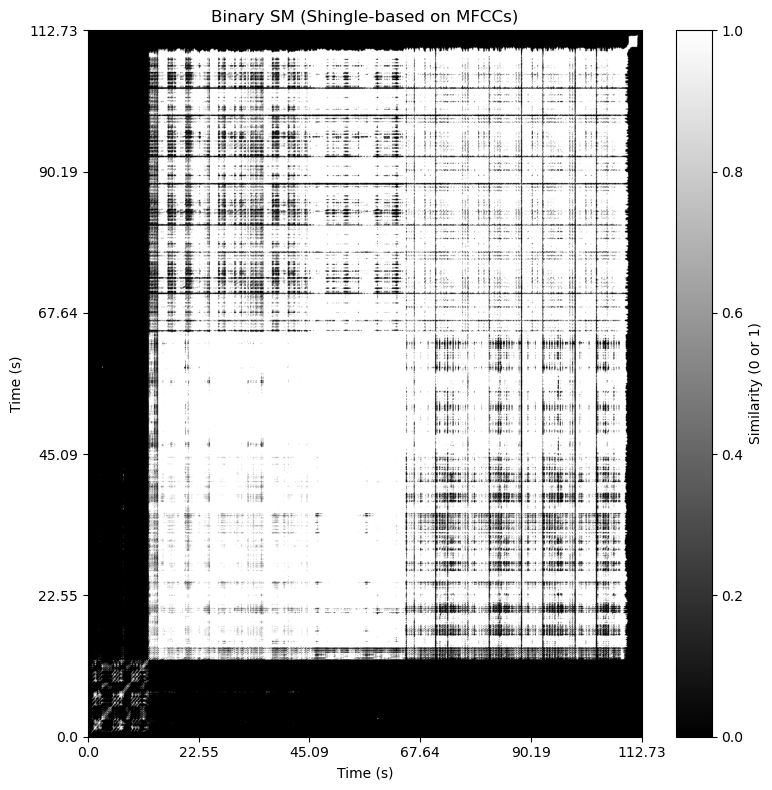

In [41]:
# Pick MFCC indices if needed
selected_mfccs = mfccs[1:13, :]  # just drop the 0th

# Create shingles: overlap sequences of MFCCs (e.g., L=10)
L = 10  # length of each shingle
shingles = []
for i in range(selected_mfccs.shape[1] - L + 1):
    shingle = selected_mfccs[:, i:i+L].flatten()  # shape: (13*L,)
    shingles.append(shingle)
shingles = np.array(shingles)

# Compute cosine similarity of shingles
sm = cosine_similarity(shingles)

# Binarize (non-Gaussian thresholding)
threshold = 0.8
binary_sm = (sm > threshold).astype(int)

# Convert frames to time for axis labels
t = librosa.frames_to_time(np.arange(binary_sm.shape[0]), sr=sr)

# Plot
plt.figure(figsize=(8, 8))
plt.imshow(binary_sm, cmap='binary_r', origin='lower', aspect='auto')
plt.xticks(np.linspace(0, len(t) - 1, 6), np.round(np.linspace(t[0], t[-1], 6), 2))
plt.yticks(np.linspace(0, len(t) - 1, 6), np.round(np.linspace(t[0], t[-1], 6), 2))
plt.xlabel('Time (s)')
plt.ylabel('Time (s)')
plt.title('Binary SM (Shingle-based on MFCCs)')
plt.colorbar(label='Similarity (0 or 1)')
plt.tight_layout()
plt.show()

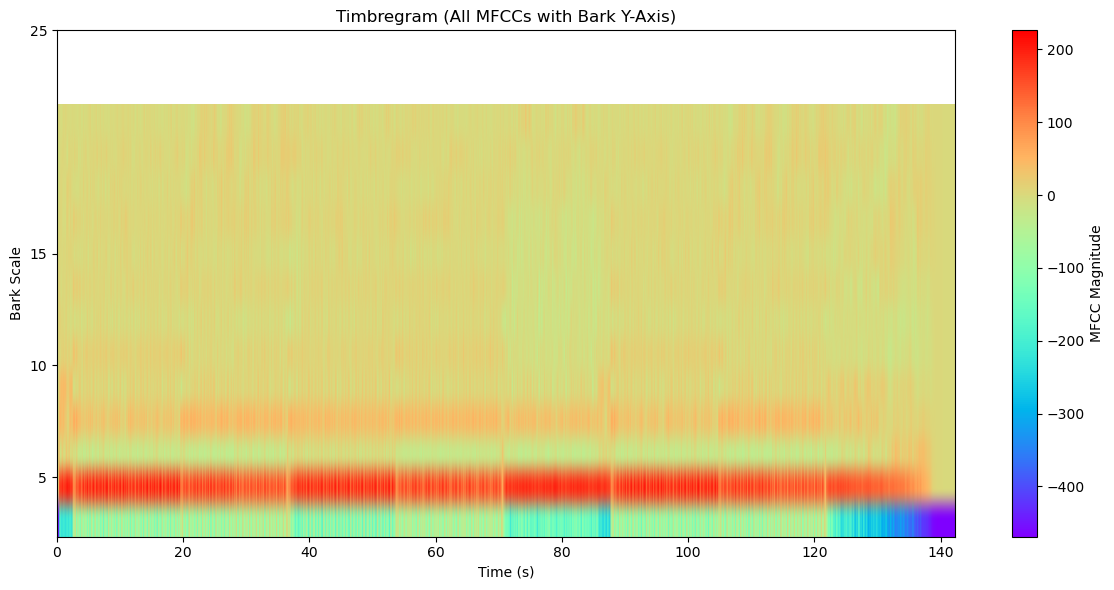

In [6]:
# Extract all MFCCs (default 13)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# Get approximate center freqs of MFCC bands via mel filterbank
n_mfcc = mfccs.shape[0]
mel_frequencies = librosa.mel_frequencies(n_mels=n_mfcc+2, fmin=0, fmax=sr/2)[1:-1]

# Convert mel center freqs to Bark scale
def hz_to_bark(f):
    return 13 * np.arctan(0.00076 * f) + 3.5 * np.arctan((f / 7500)**2)

bark_centers = hz_to_bark(mel_frequencies)

# Time axis in seconds
frames = np.arange(mfccs.shape[1])
t = librosa.frames_to_time(frames, sr=sr)

# Plot
plt.figure(figsize=(12, 6))
img = plt.imshow(mfccs, aspect='auto', origin='lower',
                 extent=[t[0], t[-1], bark_centers[0], bark_centers[-1]],
                 cmap='rainbow')

plt.colorbar(img, label='MFCC Magnitude')
plt.xlabel('Time (s)')
plt.ylabel('Bark Scale')
plt.title('Timbregram (All MFCCs with Bark Y-Axis)')

# Custom Y-axis ticks at 5, 10, 15, 25 Bark units
plt.yticks([5, 10, 15, 25], ['5', '10', '15', '25'])

plt.tight_layout()
plt.show()